In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Timestamp Cleaning

In [25]:
sensor_id = "ucm"
df = pd.read_csv(f"./data/ag_1016_1023_{sensor_id}.csv", low_memory=False)
df = df[["Local Date/Time", "PM2.5 (μg/m³)", "Temperature (°C)", "Humidity (%)"]]
df.columns = ["timestamp", "pm25", "temperature", "humidity"]
df.dropna(inplace=True)
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.sort_values(by=["timestamp"], inplace=True)

start_date = datetime.datetime(2023, 10, 16, 14,0, 0)
df = df[df["timestamp"] >= start_date]
end_date = datetime.datetime(2023, 10, 23, 14, 0, 0)
df = df[df["timestamp"] < end_date]
df

,timestamp,pm25,temperature,humidity
14840,2023-10-16 14:00:00,1.0,23.90,34.65
14839,2023-10-16 14:00:00,0.0,23.90,34.65
30935,2023-10-16 14:00:00,1.0,23.90,34.11
30934,2023-10-16 14:00:00,0.0,23.91,34.10
47030,2023-10-16 14:00:00,2.0,23.90,35.20
...,...,...,...,...
32192,2023-10-23 13:59:00,11.0,21.76,49.25
32193,2023-10-23 13:59:00,13.0,21.70,49.15
16097,2023-10-23 13:59:00,10.0,21.76,48.87
2,2023-10-23 13:59:00,12.0,21.70,48.99


In [26]:
def clean_timestamp(df):
    ts = pd.to_datetime(df["timestamp"])
    df["year"] = ts.dt.year
    df["month"] = ts.dt.month
    df["day"] = ts.dt.day
    df["hour"] = ts.dt.hour
    df["minute"] = ts.dt.minute

    df = df.drop(columns=["timestamp"])

    return df

In [27]:
df_processed = clean_timestamp(df)
df_processed

,pm25,temperature,humidity,year,month,day,hour,minute
14840,1.0,23.90,34.65,2023,10,16,14,0
14839,0.0,23.90,34.65,2023,10,16,14,0
30935,1.0,23.90,34.11,2023,10,16,14,0
30934,0.0,23.91,34.10,2023,10,16,14,0
47030,2.0,23.90,35.20,2023,10,16,14,0
...,...,...,...,...,...,...,...,...
32192,11.0,21.76,49.25,2023,10,23,13,59
32193,13.0,21.70,49.15,2023,10,23,13,59
16097,10.0,21.76,48.87,2023,10,23,13,59
2,12.0,21.70,48.99,2023,10,23,13,59


In [28]:
def average_30min(df):
    df["minute"] = df["minute"].apply(lambda x: 0 if x < 30 else 30)
    df = df.groupby(["year", "month", "day", "hour", "minute"]).mean().reset_index()
    return df

In [29]:
df_processed = average_30min(df_processed)
df_processed

,year,month,day,hour,minute,pm25,temperature,humidity
0,2023,10,16,14,0,1.111111,23.891704,34.783111
1,2023,10,16,14,30,0.954545,23.857273,34.273333
2,2023,10,16,15,0,0.689394,23.773106,34.436515
3,2023,10,16,15,30,0.577778,23.769852,36.104593
4,2023,10,16,16,0,1.121212,23.819470,37.056970
...,...,...,...,...,...,...,...,...
331,2023,10,23,11,30,6.874074,19.495481,56.357407
332,2023,10,23,12,0,6.303030,19.561515,55.242803
333,2023,10,23,12,30,6.227273,20.399545,52.689470
334,2023,10,23,13,0,9.068182,21.277803,50.132348


In [33]:
df_processed.to_csv(f"./data/ag_10162023_10232023_{sensor_id}(30MinMean).csv", index=False)

# Visualization

In [30]:
import matplotlib.pyplot as plt
import numpy as np

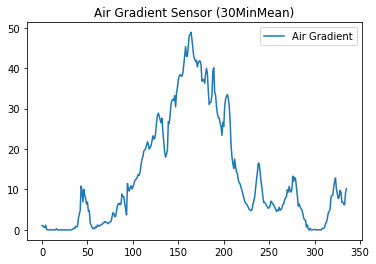

In [31]:
fig, ax = plt.subplots()
ax.plot(df_processed["pm25"], label="Air Gradient")
plt.legend()
plt.title("Air Gradient Sensor (30MinMean)")
plt.legend()